# 机器学习算法（八）：基于BP神经网络的预测

## 1.前言：算法简介和应用

### 1.1.算法简介
    BP（Back Propagation）网络是1986年由Rumelhart和McCelland为首的科学家小组提出，是一种按误差逆传播算法训练的多层前馈网络，是目前应用最广泛的神经网络模型之一。BP网络能学习和存贮大量的输入-输出模式映射关系，而无需事前揭示描述这种映射关系的数学方程。它的学习规则是使用最速下降法，通过反向传播来不断调整网络的权值和阈值，使网络的误差平方和最小。BP神经网络模型拓扑结构包括输入层（input）、隐层(hide layer)和输出层(output layer)。在模拟过程中收集系统所产生的误差，通过误差反传，然后调整权值大小，通过该不断迭代更新，最后使得模型趋于整体最优化（这是一个循环，我们在训练神经网络的时候是要不断的去重复这个过程的）。
    
    BP神经网络具有以下优点：

    1) 非线性映射能力：BP神经网络实质上实现了一个从输入到输出的映射功能，数学理论证明三层的神经网络就能够以任意精度逼近任何非线性连续函数。这使得其特别适合于求解内部机制复杂的问题，即BP神经网络具有较强的非线性映射能力。

    2) 自学习和自适应能力：BP神经网络在训练时，能够通过学习自动提取输入、输出数据间的“合理规则”，并自适应地将学习内容记忆于网络的权值中。即BP神经网络具有高度自学习和自适应的能力。

    3) 泛化能力：所谓泛化能力是指在设计模式分类器时，即要考虑网络在保证对所需分类对象进行正确分类，还要关心网络在经过训练后，能否对未见过的模式或有噪声污染的模式，进行正确的分类。也即BP神经网络具有将学习成果应用于新知识的能力。  
    
    BP神经网络具有以下缺点点：

    1) 局部极小化问题：从数学角度看，传统的 BP神经网络为一种局部搜索的优化方法，它要解决的是一个复杂非线性化问题，网络的权值是通过沿局部改善的方向逐渐进行调整的，这样会使算法陷入局部极值，权值收敛到局部极小点，从而导致网络训练失败。加上BP神经网络对初始网络权重非常敏感，以不同的权重初始化网络，其往往会收敛于不同的局部极小，这也是每次训练得到不同结果的根本原因。

    2) BP 神经网络算法的收敛速度慢：由于BP神经网络算法本质上为梯度下降法，它所要优化的目标函数是非常复杂的，因此，必然会出现“锯齿形现象”，这使得BP算法低效；又由于优化的目标函数很复杂，它必然会在神经元输出接近0或1的情况下，出现一些平坦区，在这些区域内，权值误差改变很小，使训练过程几乎停顿；BP神经网络模型中，为了使网络执行BP算法，不能使用传统的一维搜索法求每次迭代的步长，而必须把步长的更新规则预先赋予网络，这种方法也会引起算法低效。以上种种，导致了BP神经网络算法收敛速度慢的现象。

    3) BP 神经网络结构选择不一：BP神经网络结构的选择至今尚无一种统一而完整的理论指导，一般只能由经验选定。网络结构选择过大，训练中效率不高，可能出现过拟合现象，造成网络性能低，容错性下降，若选择过小，则又会造成网络可能不收敛。而网络的结构直接影响网络的逼近能力及推广性质。因此，应用中如何选择合适的网络结构是一个重要的问题。 

### 1.2.算法应用
    BP反映了生物神经系统处理外界事物的基本过程，是在模拟人脑神经组织的基础上发展起来的计算系统，是由大量处理单元通过广泛互联而构成的网络体系，它具有生物神经系统的基本特征，在一定程度上反映了人脑功能的若干反映，是对生物系统的某种模拟，具有大规模并行、分布式处理、自组织、自学习等优点，被广泛应用于语音分析、图像识别、数字水印、计算机视觉等很多领域，取得了许多突出的成果。最近由于人工神经网络的快速发展，它已经成为模式识别的强有力的工具。神经网络的运用展开了新的领域，解决其它模式识别不能解决的问题，其分类功能特别适合于模式识别与分类的应用。 

## 2.学习目标
+ 掌握BP算法基本原理
+ 掌握利用BP进行代码实战

## 3.代码流程
### Part 1 Demo实践
+ Step1:库函数导入
+ Step2:模型训练
+ Step3:模型参数查看
+ Step4:数据和模型可视化
+ Step5:模型预测

### Part 2  基于BP神经网络的乳腺癌分类实践
+ Step1:库函数导入
+ Step2:数据读取/载入
+ Step3:数据信息简单查看与可视化 
+ Step4:利用BP神经网络在乳腺癌数据上进行训练和预测 

## 4.代码实战 

### Part 1 Demo实践
+ Step1:库函数导入

In [3]:
# 基础数组运算库导入
import numpy as np 
# 画图库导入
import matplotlib.pyplot as plt 
# 导入三维显示工具
from mpl_toolkits.mplot3d import Axes3D
# 导入BP模型
from sklearn.neural_network import MLPClassifier
# 导入demo数据制作方法
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

+ Step2:模型训练

Text(0.5, 0.92, 'Demo Data Map')

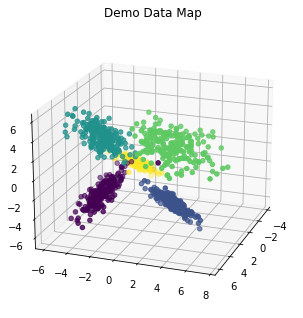

In [4]:
# 制作五个类别的数据，每个类别1000个样本
train_samples, train_labels = make_classification(n_samples=1000, n_features=3, n_redundant=0,
                           n_classes=5, n_informative=3, n_clusters_per_class=1,
                           class_sep=3, random_state=10)
# 将五个类别的数据进行三维显示
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=20)
ax.scatter(train_samples[:, 0], train_samples[:, 1], train_samples[:, 2], marker='o', c=train_labels)
plt.title('Demo Data Map')

In [5]:
# 建立 BP 模型, 采用sgd优化器，relu非线性映射函数
BP = MLPClassifier(solver='sgd',activation = 'relu',max_iter = 500,alpha = 1e-3,hidden_layer_sizes = (32,32),random_state = 1)
# 进行模型训练
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    BP.fit(train_samples, train_labels)

+ Step3:模型参数查看

In [6]:
# 查看 BP 模型的参数
print(BP)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=500,
              random_state=1, solver='sgd')


+ Step4:数据和模型可视化

预测准确率: 0.9950
真实类别： [0 4 2 2 3 2 3 0 1 0]
预测类别： [0 4 2 2 3 2 3 0 1 0]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       198
           1       1.00      0.99      0.99       203
           2       1.00      1.00      1.00       200
           3       0.99      1.00      1.00       199
           4       0.99      0.99      0.99       200

    accuracy                           0.99      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      0.99      1.00      1000



E:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
<ipython-input-7-9b6fea3d5f3b>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes, minor=True)
<ipython-input-7-9b6fea3d5f3b>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes, minor=True)


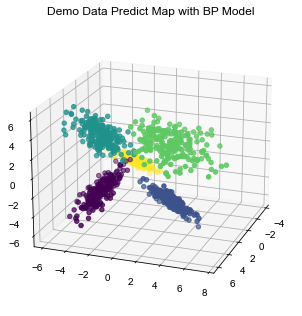

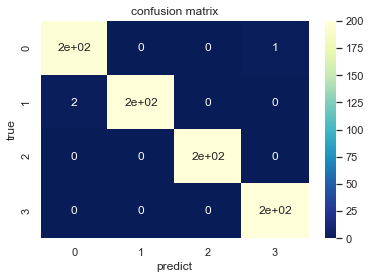

In [7]:
# 进行模型预测
predict_labels = BP.predict(train_samples)
# 显示预测的散点图
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=20)
ax.scatter(train_samples[:, 0], train_samples[:, 1], train_samples[:, 2], marker='o', c=predict_labels)
plt.title('Demo Data Predict Map with BP Model')

# 显示预测分数
print("预测准确率: {:.4f}".format(BP.score(train_samples, train_labels)))

# 可视化预测数据 
print("真实类别：", train_labels[:10])
print("预测类别：", predict_labels[:10])
# 准确率等报表
print(classification_report(train_labels, predict_labels))

# 计算混淆矩阵
classes = [0, 1, 2, 3]
cofusion_mat = confusion_matrix(train_labels, predict_labels, classes) 
sns.set()
figur, ax = plt.subplots()
# 画热力图
sns.heatmap(cofusion_mat, cmap="YlGnBu_r", annot=True, ax=ax) 
ax.set_title('confusion matrix')  # 标题
ax.set_xticklabels([''] + classes, minor=True)
ax.set_yticklabels([''] + classes, minor=True)
ax.set_xlabel('predict')  # x轴
ax.set_ylabel('true')  # y轴
plt.show()

+ Step5:模型预测

In [8]:
# 进行新的测试数据测试
test_sample = np.array([[-1, 0.1, 0.1]])
print(f"{test_sample} 类别是: ", BP.predict(test_sample))
print(f"{test_sample} 类别概率分别是: ", BP.predict_proba(test_sample))

test_sample = np.array([[-1.2, 10, -91]])
print(f"{test_sample} 类别是: ", BP.predict(test_sample))
print(f"{test_sample} 类别概率分别是: ", BP.predict_proba(test_sample))

test_sample = np.array([[-12, -0.1, -0.1]])
print(f"{test_sample} 类别是: ", BP.predict(test_sample))
print(f"{test_sample} 类别概率分别是: ", BP.predict_proba(test_sample))

test_sample = np.array([[100, -90.1, -9.1]])
print(f"{test_sample} 类别是: ", BP.predict(test_sample))
print(f"{test_sample} 类别概率分别是: ", BP.predict_proba(test_sample))

[[-1.   0.1  0.1]] 类别是:  [4]
[[-1.   0.1  0.1]] 类别概率分别是:  [[0.08380116 0.1912275  0.17608601 0.16488309 0.38400224]]
[[ -1.2  10.  -91. ]] 类别是:  [1]
[[ -1.2  10.  -91. ]] 类别概率分别是:  [[3.37231505e-30 1.00000000e+00 4.24566351e-51 1.92771500e-57
  5.16916174e-17]]
[[-12.   -0.1  -0.1]] 类别是:  [4]
[[-12.   -0.1  -0.1]] 类别概率分别是:  [[1.42696980e-06 5.86057194e-05 2.99819240e-05 3.03896335e-05
  9.99879596e-01]]
[[100.  -90.1  -9.1]] 类别是:  [2]
[[100.  -90.1  -9.1]] 类别概率分别是:  [[2.45024178e-02 8.44965777e-67 9.75497582e-01 1.41511057e-66
  4.23516105e-50]]


### Part 2  基于BP神经网络的乳腺癌分类实践

+ Step1:库函数导入

In [9]:
# 导入乳腺癌数据集
from sklearn.datasets import load_breast_cancer
# 导入BP模型
from sklearn.neural_network import MLPClassifier
# 导入训练集分割方法
from sklearn.model_selection import train_test_split 
# 导入预测指标计算函数和混淆矩阵计算函数
from sklearn.metrics import classification_report, confusion_matrix
# 导入绘图包
import seaborn as sns
import matplotlib

+ Step2:数据读取/载入

In [10]:
# 导入乳腺癌数据集
cancer = load_breast_cancer()

+ Step3:数据信息简单查看与可视化 

In [11]:
# 查看数据集信息
print('breast_cancer数据集的长度为：',len(cancer))
print('breast_cancer数据集的类型为：',type(cancer))
# 分割数据为训练集和测试集
cancer_data = cancer['data']
print('cancer_data数据维度为：',cancer_data.shape)
cancer_target = cancer['target']
print('cancer_target标签维度为：',cancer_target.shape)
cancer_names = cancer['feature_names']
cancer_desc = cancer['DESCR']
#分为训练集与测试集
cancer_data_train,cancer_data_test = train_test_split(cancer_data,test_size=0.2,random_state=42)#训练集
cancer_target_train,cancer_target_test = train_test_split(cancer_target,test_size=0.2,random_state=42)#测试集

breast_cancer数据集的长度为： 7
breast_cancer数据集的类型为： <class 'sklearn.utils.Bunch'>
cancer_data数据维度为： (569, 30)
cancer_target标签维度为： (569,)


+ Step4:利用BP在乳腺癌数据上进行训练和预测

In [12]:
# 建立 BP 模型, 采用Adam优化器，relu非线性映射函数
BP = MLPClassifier(solver='adam',activation = 'relu',max_iter = 1000,alpha = 1e-3,hidden_layer_sizes = (64,32, 32),random_state = 1)
# 进行模型训练
BP.fit(cancer_data_train, cancer_target_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(64, 32, 32), max_iter=1000,
              random_state=1)

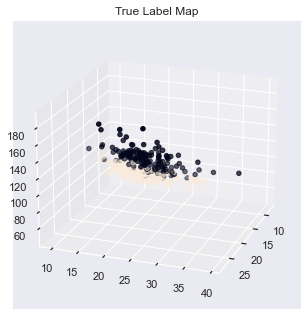

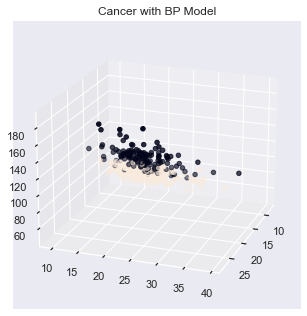

In [13]:
# 进行模型预测
predict_train_labels = BP.predict(cancer_data_train)
# 可视化真实数据
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=20) 
ax.scatter(cancer_data_train[:, 0], cancer_data_train[:, 1], cancer_data_train[:, 2], marker='o', c=cancer_target_train)
plt.title('True Label Map')
plt.show()
# 可视化预测数据
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=20) 
ax.scatter(cancer_data_train[:, 0], cancer_data_train[:, 1], cancer_data_train[:, 2], marker='o', c=predict_train_labels)
plt.title('Cancer with BP Model')
plt.show()

In [14]:
# 显示预测分数
print("预测准确率: {:.4f}".format(BP.score(cancer_data_test, cancer_target_test)))
# 进行测试集数据的类别预测
predict_test_labels = BP.predict(cancer_data_test)
print("测试集的真实标签:\n", cancer_target_test)
print("测试集的预测标签:\n", predict_test_labels)

预测准确率: 0.9474
测试集的真实标签:
 [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
测试集的预测标签:
 [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [15]:
# 进行预测结果指标统计 统计每一类别的预测准确率、召回率、F1分数
print(classification_report(cancer_target_test, predict_test_labels))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [16]:
# 计算混淆矩阵
confusion_mat = confusion_matrix(cancer_target_test, predict_test_labels)
# 打混淆矩阵
print(confusion_mat)

[[37  6]
 [ 0 71]]


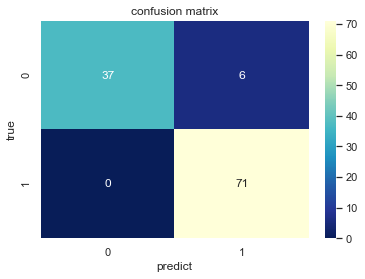

In [17]:
# 将混淆矩阵以热力图的防线显示
sns.set()
figure, ax = plt.subplots()
# 画热力图
sns.heatmap(confusion_mat, cmap="YlGnBu_r", annot=True, ax=ax)  
# 标题 
ax.set_title('confusion matrix')
# x轴为预测类别
ax.set_xlabel('predict')  
# y轴实际类别
ax.set_ylabel('true')  
plt.show()

## 5. 算法重要知识点

BP神经网络模型要点在于数据的前向传播和误差反向传播，来对参数进行更新，使得损失最小化。 误差反向传播算法简称反向传播算法（即BP算法）。使用反向传播算法的多层感知器又称为BP神经网络。BP算法是一个迭代算法，它的基本思想为：        
（1）先计算每一层的状态和激活值，直到最后一层（即信号是前向传播的）；      
（2）计算每一层的误差，误差的计算过程是从最后一层向前推进的（这就是反向传播算法名字的由来）；     
（3）更新参数（目标是误差变小）。迭代前面两个步骤，直到满足停止准则（比如相邻两次迭代的误差的差别很小）。      
在这个过程，函数的导数链式法则求导很重要，需要手动推导BP神经网络模型的梯度反向传播过程，熟练掌握链式法则进行求导，对参数进行更新。